In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from plotnine import *
from plotnine.exceptions import PlotnineWarning
from plotnine.data import meat
import seaborn as sns

1. visualize malaria_deaths dataset, x-axis: Year, y-axis: Deaths. Different color represents different Entity.

In [62]:
df=pd.read_csv('malaria_deaths.csv')
df

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472
...,...,...,...,...
6151,Zimbabwe,ZWE,2012,9.751727
6152,Zimbabwe,ZWE,2013,9.419939
6153,Zimbabwe,ZWE,2014,9.487453
6154,Zimbabwe,ZWE,2015,9.440046


In [58]:
df1 = df[df['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'] > 0]

df1=df1.dropna(axis=0)
df1.rename(columns={'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)':'Deaths'},inplace = True)

Split the Deaths into 6 part, and use plotnine to visualize these parts.

In [59]:
df1.reset_index(drop=True, inplace=True)
df0=df1[df1['Deaths'] < 0.05]
df0.reset_index(drop=True, inplace=True)
df7=df1[df1['Deaths'] < 0.25][df1['Deaths'] >0.05]
df7.reset_index(drop=True, inplace=True)
df2=df1[df1['Deaths'] < 1][df1['Deaths'] >0.25]
df2.reset_index(drop=True, inplace=True)
df3=df1[df1['Deaths'] > 1][df1['Deaths'] < 10]
df3.reset_index(drop=True, inplace=True)
df4=df1[df1['Deaths'] > 10][df1['Deaths'] < 50]
df4.reset_index(drop=True, inplace=True)
df5=df1[df1['Deaths'] > 50][df1['Deaths'] < 100]
df5.reset_index(drop=True, inplace=True)
df6=df1[df1['Deaths'] > 100]
df6.reset_index(drop=True, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


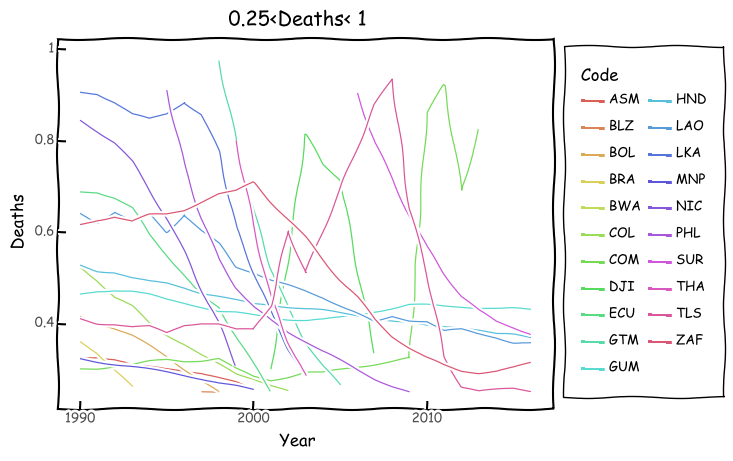

In [60]:

p = (
    ggplot(df2, aes(x='Year', y='Deaths', color='Code')) +
    geom_line() +
    theme_xkcd() +
    labs(title="0.25<Deaths< 1")
)

p.draw();

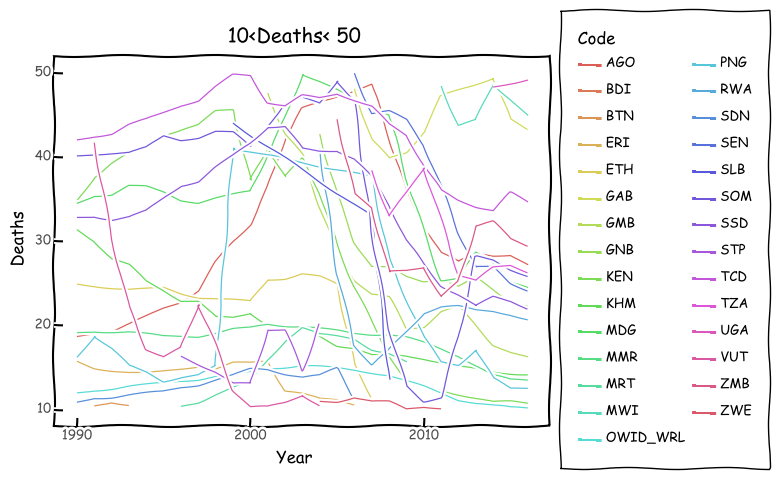

In [44]:

p = (
    ggplot(df4, aes(x='Year', y='Deaths', color='Code')) +
    geom_line() +
    theme_xkcd() +
    labs(title="10<Deaths< 50")
)
p.draw();

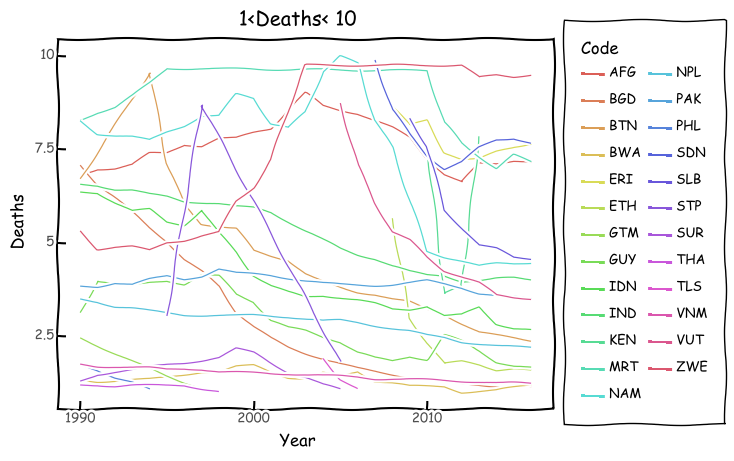

In [45]:
p = (
    ggplot(df3, aes(x='Year', y='Deaths', color='Code')) +
    geom_line() +
    theme_xkcd() +
    labs(title="1<Deaths< 10")
)
p.draw();

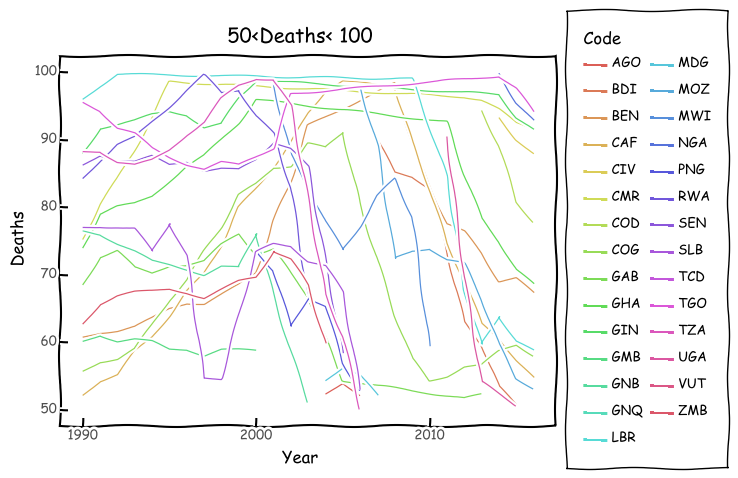

In [46]:
p = (
    ggplot(df5, aes(x='Year', y='Deaths', color='Code')) +
    geom_line() +
    theme_xkcd() +
    labs(title="50<Deaths< 100")
)
p.draw();

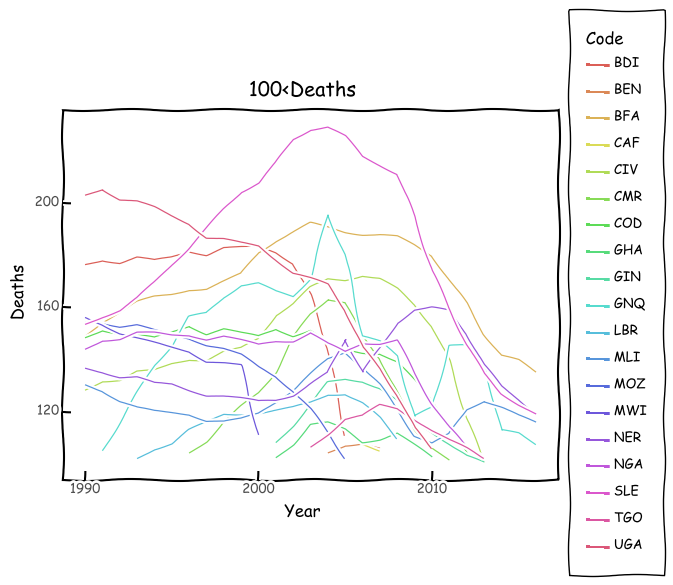

In [49]:
p = (
    ggplot(df6, aes(x='Year', y='Deaths', color='Code')) +
    geom_line() +
    theme_xkcd() +
    labs(title="100<Deaths")
)
p.draw();

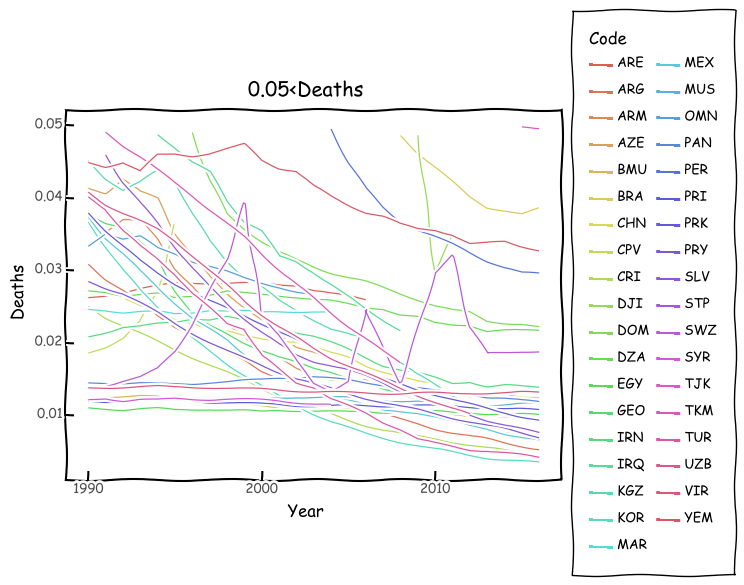

In [50]:
p = (
    ggplot(df0, aes(x='Year', y='Deaths', color='Code')) +
    geom_line() +
    theme_xkcd() +
    labs(title="0.05<Deaths")
)
p.draw();

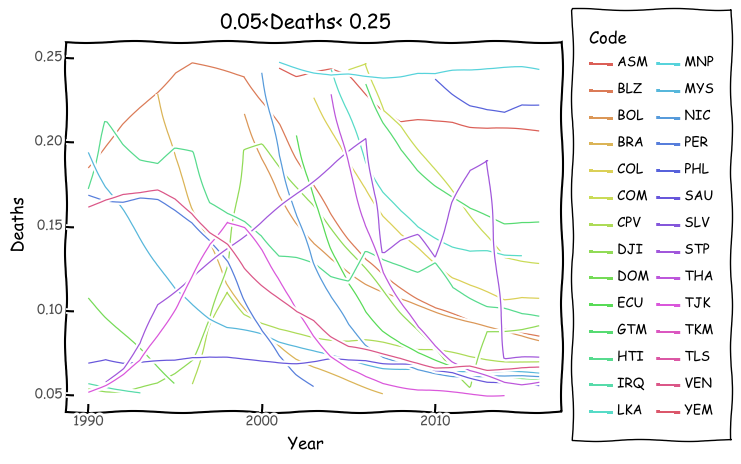

In [51]:
p = (
    ggplot(df7, aes(x='Year', y='Deaths', color='Code')) +
    geom_line() +
    theme_xkcd() +
    labs(title="0.05<Deaths< 0.25")
)
p.draw();

2. visualize malaria_deaths_age dataset, x-axis: Year/age group, y-axis: Deaths. Choose age and year to visualize and use sns

In [33]:
df_age=pd.read_csv('malaria_deaths_age.csv')
df_age


,Unnamed: 0,entity,code,year,age_group,deaths
0,1,Afghanistan,AFG,1990,Under 5,184.606435
1,2,Afghanistan,AFG,1991,Under 5,191.658193
2,3,Afghanistan,AFG,1992,Under 5,197.140197
3,4,Afghanistan,AFG,1993,Under 5,207.357753
4,5,Afghanistan,AFG,1994,Under 5,226.209363
...,...,...,...,...,...,...
30775,30776,Zimbabwe,ZWE,2012,50-69,103.185111
30776,30777,Zimbabwe,ZWE,2013,50-69,100.113293
30777,30778,Zimbabwe,ZWE,2014,50-69,99.013890
30778,30779,Zimbabwe,ZWE,2015,50-69,98.091738


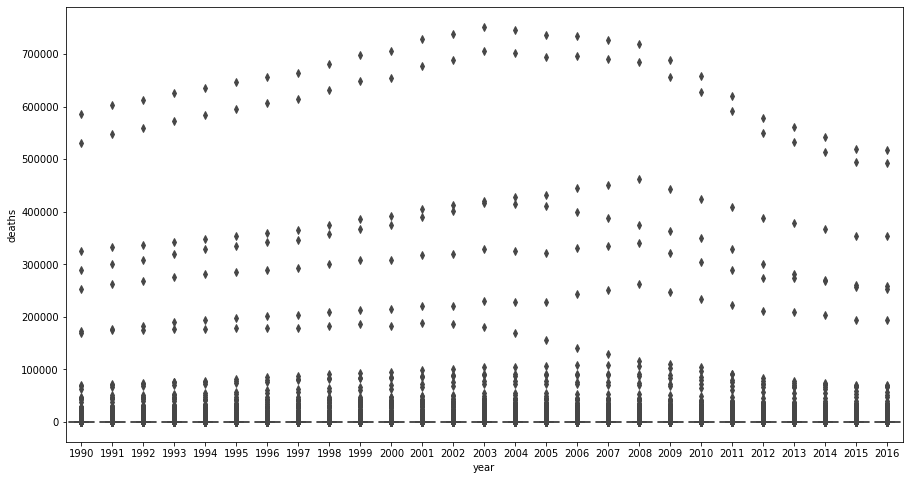

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_age["year"],y=df_age["deaths"])


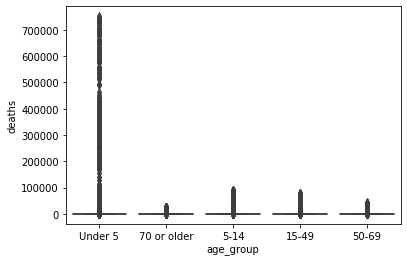

In [53]:
sns.boxplot(x=df_age["age_group"],y=df_age["deaths"])

3. visualize malaria_inc dataset, x-axis: Year/Code group, y-axis: Incidence. Choose age and year to visualize and use sns

In [64]:
df_inc=pd.read_csv('malaria_inc.csv')
df_inc


,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746
...,...,...,...,...
503,Zambia,ZMB,2015,173.700000
504,Zimbabwe,ZWE,2000,143.200000
505,Zimbabwe,ZWE,2005,142.500000
506,Zimbabwe,ZWE,2010,129.600000


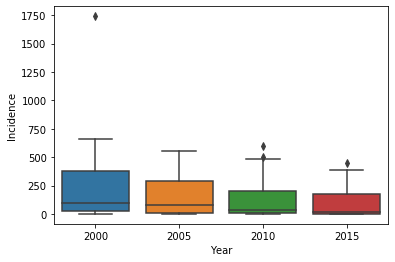

In [55]:
df_inc.rename(columns={'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)':'Incidence'},inplace = True)
sns.boxplot(x=df_inc["Year"],y=df_inc["Incidence"])

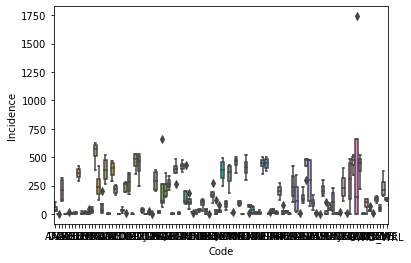

In [57]:
sns.boxplot(x=df_inc["Code"],y=df_inc["Incidence"])